# Python for Data Science
## Session 8
### Plotting


---

# Given Data
   

In [208]:
import pandas as pd
import numpy as np

data = {
    'Student Name': ['Amelie', 'Edgar', 'Jordi', 'Marçal', 'Pep', 'Jaume', 'Marco', 
                     'Ludmila', 'Bastian', 'Marc', 'Gerardo', 'Javier', 'Frank', 'Julia'],
    'Course': ['Artificial Intelligence', 'Python for Data Science', 'Cloud Computing', 'Computer Vision', 
               'Artificial Intelligence', 'Python for Data Science', 'Cloud Computing', 'Computer Vision', 
               'Artificial Intelligence', 'Python for Data Science', 'Cloud Computing', 'Computer Vision', 
               'Artificial Intelligence', 'Python for Data Science'],
    'Grade': [85, 92, 78, 88, 91, 84, 73, 95, 90, 80, 85, 87, 89, 92],
    'Gender': ['Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female'],
    'Study Time': [15, 20, 10, 8, 18, 14, 11, 16, 19, 13, 16, 12, 17, 15],
    'Age': [22, 21, 23, 22, 20, 24, 22, 21, 23, 21, 22, 22, 21, 20]
}

df = pd.DataFrame(data)
df.head(5)

,Student Name,Course,Grade,Gender,Study Time,Age
0,Amelie,Artificial Intelligence,85,Female,15,22
1,Edgar,Python for Data Science,92,Male,20,21
2,Jordi,Cloud Computing,78,Male,10,23
3,Marçal,Computer Vision,88,Male,8,22
4,Pep,Artificial Intelligence,91,Male,18,20


#### 1. Create a *lineplot* showing how **Study Time** varies by **Student Name**. Which student has the highest study time? ####

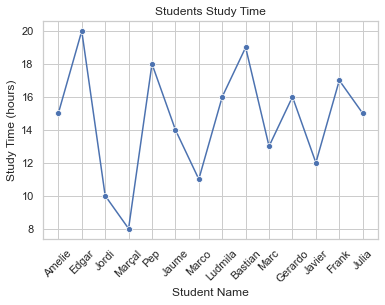

----Student with the Most Study Time----
Edgar has the highest study time of 20 hours.


In [221]:
"""
This code creates a lineplot using the data on Students, wherein Study Time and Student Name were extracted.
"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=df, x='Student Name', y='Study Time', marker='o')

plt.xlabel('Student Name')
plt.ylabel('Study Time (hours)')
plt.title('Students Study Time')

plt.xticks(rotation=45)

plt.show()

max_studytime = df.loc[df['Study Time'].idxmax()]
print("----Student with the Most Study Time----")
print(f"{max_studytime['Student Name']} has the highest study time of {max_studytime['Study Time']} hours.")


#### 2. Plot a histogram (*histplot*) of **Grade** and determine which grade range has the highest frequency of students. ####

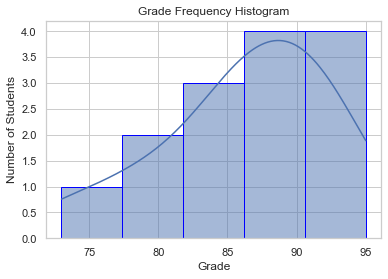

----Grade Range with Highest Frequency, Given that Bins is Set to Auto----
The grade range that has the highest frequency of students is 86-90, with 4 students.


In [224]:
"""
This code creates a histogram using the data on Students, wherein Number of Students and Grades were extracted.
"""


sns.histplot(df['Grade'], bins='auto', edgecolor='blue',kde=True)

plt.xlabel('Grade')
plt.ylabel('Number of Students')
plt.title('Grade Frequency Histogram')

plt.show()
counts, bins = np.histogram(df['Grade'], bins='auto')
max_count = counts.max()
grade_frequency = bins[counts.argmax():counts.argmax()+2]

print("----Grade Range with Highest Frequency, Given that Bins is Set to Auto----")
print(f"The grade range that has the highest frequency of students is {int(grade_frequency[0])}-{int(grade_frequency[1])}, with {max_count} students.")

#### 3. Create an ECDF plot (*ecdfplot*) for **Grade**. What is the percentage of students scoring less than 85? ####

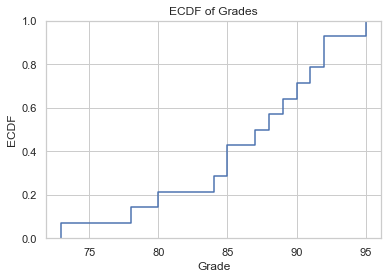

----Percentage of Students Less than 85 Scores----
The percentage of students scoring less than 85 is 28.57%


In [225]:
"""
This code creates a ECDF using the data on Students, wherein Grades and Empirical Cumulative Distribution Function were extracted and computed for.
"""


sns.ecdfplot(df['Grade'])

plt.xlabel('Grade')
plt.ylabel('ECDF')
plt.title('ECDF of Grades')

plt.show()

under_85 = (df['Grade'] < 85).sum() / len(df) * 100
print("----Percentage of Students Less than 85 Scores----")
print(f"The percentage of students scoring less than 85 is {under_85:.2f}%")

#### 4. Create a *stripplot* showing **Grade** distribution for each **Course**. Which course has the most spread in grades? 


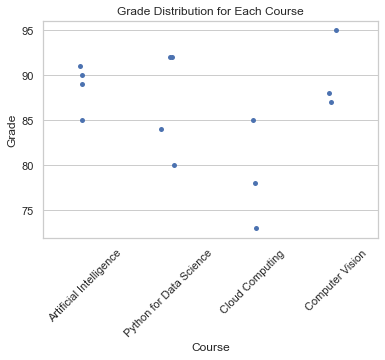

----Course with Most Spread----
Cloud Computing has the most spread in grades, with a standard deviation of 6.03.


In [226]:
"""
This code creates a stripplot using the data on Students, wherein Grades and Courses were extracted.
"""

sns.stripplot(data=df, x='Course', y='Grade', jitter=True)

plt.xlabel('Course')
plt.ylabel('Grade')
plt.title('Grade Distribution for Each Course')
plt.xticks(rotation=45)

plt.show()

course_spread = df.groupby('Course')['Grade'].std()
most_spread_course = course_spread.idxmax()
most_spread_value = course_spread.max()

print("----Course with Most Spread----")
print(f"{most_spread_course} has the most spread in grades, with a standard deviation of {most_spread_value:.2f}.")

#### 5. Create a *swarmplot* to show the relationship between Gender and **Study Time**. Which gender has a higher average study time? ####

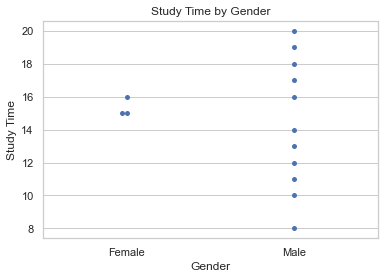

----Average study time for Each Gender----
Gender
Female    15.333333
Male      14.363636
Name: Study Time, dtype: float64
Females have the highest average study time, which is 15.33 hours.


In [227]:
"""
This code creates a swarmplot using the data on Students, wherein Gender and Study Timw were extracted.
"""

sns.swarmplot(data=df, x='Gender', y='Study Time')

plt.xlabel('Gender')
plt.ylabel('Study Time')
plt.title('Study Time by Gender')

plt.show()

average_study_time = df.groupby('Gender')['Study Time'].mean()
print(f"----Average study time for Each Gender----\n{average_study_time}")

female_average = average_study_time['Female']
print(f"Females have the highest average study time, which is {female_average:.2f} hours.")

#### 6. Plot a *pointplot* to show the average **Grade** for each Course. Which course has the highest average grade? ####

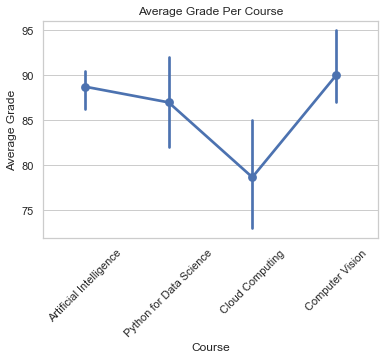

----Average grade per course----
Course
Artificial Intelligence    88.750000
Cloud Computing            78.666667
Computer Vision            90.000000
Python for Data Science    87.000000
Name: Grade, dtype: float64
Computer Vision has the highest average grade, which is 90.00.


In [228]:
"""
This code creates a pointplot using the data on Students, wherein Grade and Courses were extracted.
"""

sns.pointplot(data=df, x='Course', y='Grade', markers='o')

plt.xlabel('Course')
plt.ylabel('Average Grade')
plt.title('Average Grade Per Course')

plt.xticks(rotation=45)  
plt.show()

average_grade_by_course = df.groupby('Course')['Grade'].mean()
print(f"----Average grade per course----\n{average_grade_by_course}")

highest_avg_grade_course = average_grade_by_course.idxmax()
highest_avg_grade = average_grade_by_course.max()
print(f"{highest_avg_grade_course} has the highest average grade, which is {highest_avg_grade:.2f}.")